# World_carbon_dioxide Interactive visualization per GDP

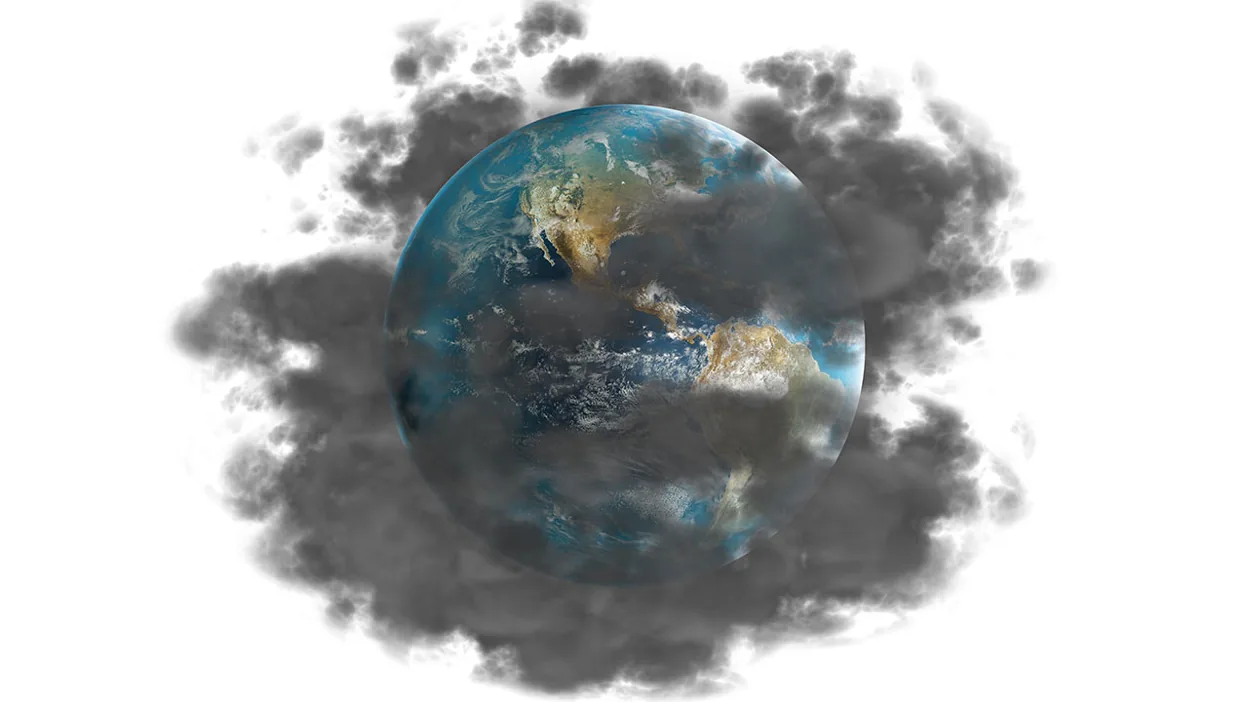

In [1]:
#!pip install plotly_express

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px

In [3]:
co2 = pd.read_csv('co2.csv')

In [4]:
co2.head()

country  1800  1801  1802  1803  1804  1805  1806  1807  1808  ...  \
0  Afghanistan   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
1      Albania   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
2      Algeria   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
3      Andorra   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
4       Angola   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   

     2005    2006    2007   2008   2009   2010   2011  2012   2013   2014  
0  0.0529  0.0637  0.0854  0.154  0.242  0.294  0.412  0.35  0.316  0.299  
1  1.3800  1.2800  1.3000  1.460  1.480  1.560  1.790  1.68  1.730  1.960  
2  3.2200  2.9900  3.1900  3.160  3.420  3.300  3.290  3.46  3.510  3.720  
3  7.3000  6.7500  6.5200  6.430  6.120  6.120  5.870  5.92  5.900  5.830  
4  0.9800  1.1000  1.2000  1.180  1.230  1.240  1.250  1.33  1.250  1.290  

[5 rows x 216 columns]

In [7]:
gm = pd.read_csv('gapminder.csv')

In [8]:
gm.head()

Country  Year  fertility    life  population  child_mortality     gdp  \
0  Afghanistan  1964      7.671  33.639  10474903.0            339.7  1182.0   
1  Afghanistan  1965      7.671  34.152  10697983.0            334.1  1182.0   
2  Afghanistan  1966      7.671  34.662  10927724.0            328.7  1168.0   
3  Afghanistan  1967      7.671  35.170  11163656.0            323.3  1173.0   
4  Afghanistan  1968      7.671  35.674  11411022.0            318.1  1187.0   

       region  
0  South Asia  
1  South Asia  
2  South Asia  
3  South Asia  
4  South Asia

changing the c02 df into the same shape as gm

In [9]:
df_gm = gm[['Country', 'region']].drop_duplicates()

In [10]:
df_gm.head()# this is the mapping of region to their respective country 

Country                      region
0            Afghanistan                  South Asia
50               Albania       Europe & Central Asia
100              Algeria  Middle East & North Africa
150               Angola          Sub-Saharan Africa
200  Antigua and Barbuda                     America

In [11]:
df_w_region = pd.merge(co2, df_gm, left_on='country', right_on='Country', how= 'inner')

In [12]:
df_w_region.head()

country  1800  1801  1802  1803  1804  1805  1806  1807  1808  \
0          Afghanistan   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1              Albania   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2              Algeria   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
3               Angola   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
4  Antigua and Barbuda   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

   ...    2007   2008   2009   2010   2011  2012   2013   2014  \
0  ...  0.0854  0.154  0.242  0.294  0.412  0.35  0.316  0.299   
1  ...  1.3000  1.460  1.480  1.560  1.790  1.68  1.730  1.960   
2  ...  3.1900  3.160  3.420  3.300  3.290  3.46  3.510  3.720   
3  ...  1.2000  1.180  1.230  1.240  1.250  1.33  1.250  1.290   
4  ...  5.1400  5.190  5.450  5.540  5.360  5.42  5.360  5.380   

               Country                      region  
0          Afghanistan                  South Asia  
1              Albania       Europe & Central Asia  
2              Algeria  Middle East & North Africa  
3               Angola          Sub-Saharan Africa  
4  Antigua and Barbuda                     America  

[5 rows x 218 columns]

In [13]:
# I dont need both countries so drop one
df_w_regions = df_w_region.drop('Country', axis = 1)

In [14]:
df_w_regions.head()

country  1800  1801  1802  1803  1804  1805  1806  1807  1808  \
0          Afghanistan   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1              Albania   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2              Algeria   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
3               Angola   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
4  Antigua and Barbuda   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

   ...    2006    2007   2008   2009   2010   2011  2012   2013   2014  \
0  ...  0.0637  0.0854  0.154  0.242  0.294  0.412  0.35  0.316  0.299   
1  ...  1.2800  1.3000  1.460  1.480  1.560  1.790  1.68  1.730  1.960   
2  ...  2.9900  3.1900  3.160  3.420  3.300  3.290  3.46  3.510  3.720   
3  ...  1.1000  1.2000  1.180  1.230  1.240  1.250  1.33  1.250  1.290   
4  ...  4.9100  5.1400  5.190  5.450  5.540  5.360  5.42  5.360  5.380   

                       region  
0                  South Asia  
1       Europe & Central Asia  
2  Middle East & North Africa  
3          Sub-Saharan Africa  
4                     America  

[5 rows x 217 columns]

In [15]:
new_co2= pd.melt(df_w_regions, id_vars = ['country','region'])

In [16]:
new_co2.head()

country                      region variable  value
0          Afghanistan                  South Asia     1800    NaN
1              Albania       Europe & Central Asia     1800    NaN
2              Algeria  Middle East & North Africa     1800    NaN
3               Angola          Sub-Saharan Africa     1800    NaN
4  Antigua and Barbuda                     America     1800    NaN

In [17]:
columns = ['country', 'region', 'year', 'co2']
new_co2.columns = columns 

In [18]:
new_co2.head()

country                      region  year  co2
0          Afghanistan                  South Asia  1800  NaN
1              Albania       Europe & Central Asia  1800  NaN
2              Algeria  Middle East & North Africa  1800  NaN
3               Angola          Sub-Saharan Africa  1800  NaN
4  Antigua and Barbuda                     America  1800  NaN

In [19]:
# Selecting the co2 values after 1963
df_co2= new_co2[new_co2['year'].astype('int64')>1963]

In [20]:
df_co2.head()

country                      region  year     co2
28372          Afghanistan                  South Asia  1964  0.0863
28373              Albania       Europe & Central Asia  1964  1.0900
28374              Algeria  Middle East & North Africa  1964  0.4600
28375               Angola          Sub-Saharan Africa  1964  0.2010
28376  Antigua and Barbuda                     America  1964  1.5400

In [21]:
df_co2 = df_co2.sort_values(by=['country','year'])
df_co2['year']= df_co2['year'].astype('int64')
df_co2.head()

country      region  year     co2
28372  Afghanistan  South Asia  1964  0.0863
28545  Afghanistan  South Asia  1965  0.1010
28718  Afghanistan  South Asia  1966  0.1080
28891  Afghanistan  South Asia  1967  0.1240
29064  Afghanistan  South Asia  1968  0.1160

In [22]:
# selecting just he gpd and co2 from gapminder data
df_gdp = gm[['Country', 'Year', 'gdp']]
df_gdp.columns = ['country', 'year', 'gdp']
df_gdp.head()

country  year     gdp
0  Afghanistan  1964  1182.0
1  Afghanistan  1965  1182.0
2  Afghanistan  1966  1168.0
3  Afghanistan  1967  1173.0
4  Afghanistan  1968  1187.0

In [23]:
df_gdp.shape

(10111, 3)

In [24]:
data = pd.merge(df_co2,df_gdp, on =['country', 'year'],how = 'left')

In [25]:
data.head()

country      region  year     co2     gdp
0  Afghanistan  South Asia  1964  0.0863  1182.0
1  Afghanistan  South Asia  1965  0.1010  1182.0
2  Afghanistan  South Asia  1966  0.1080  1168.0
3  Afghanistan  South Asia  1967  0.1240  1173.0
4  Afghanistan  South Asia  1968  0.1160  1187.0

### Visualisation

In [26]:
data.isnull().sum()

country      0
region       0
year         0
co2        448
gdp        173
dtype: int64

In [27]:
data = data.dropna()

In [28]:
data.isnull().sum()

country    0
region     0
year       0
co2        0
gdp        0
dtype: int64

In [29]:
xmin,xmax = min(data['gdp']), max(data['gdp'])
ymin,ymax = min(data['co2']), max(data['co2'])

In [30]:
fig = px.scatter(data, x= 'gdp', y = 'co2', animation_frame = 'year', 
                animation_group = 'country', color ='region',
                hover_name= 'country', facet_col = 'region', width = 1580, height = 400, log_x = True, size_max=45,
                range_x =[xmin,xmax], range_y=[ymin,ymax])

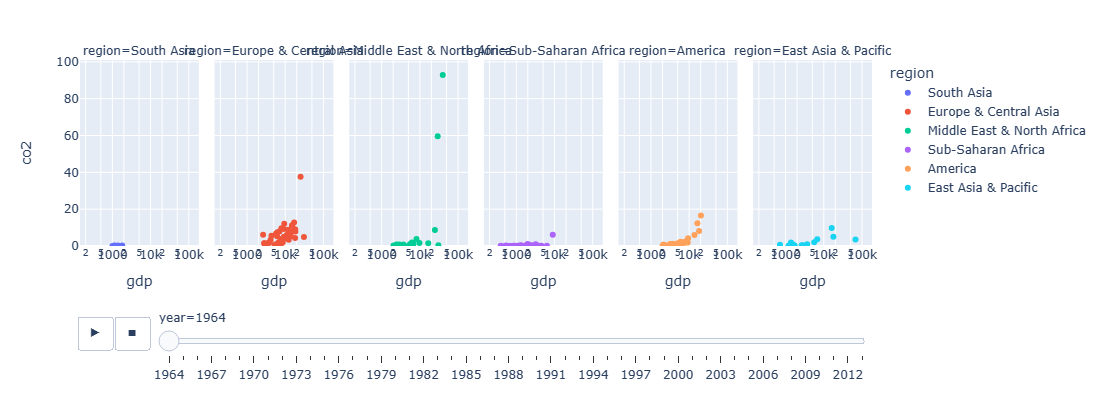

In [31]:
fig.show()

## This plot is an animation live plot, it requires a functioning interface to run. Below is a screenshot

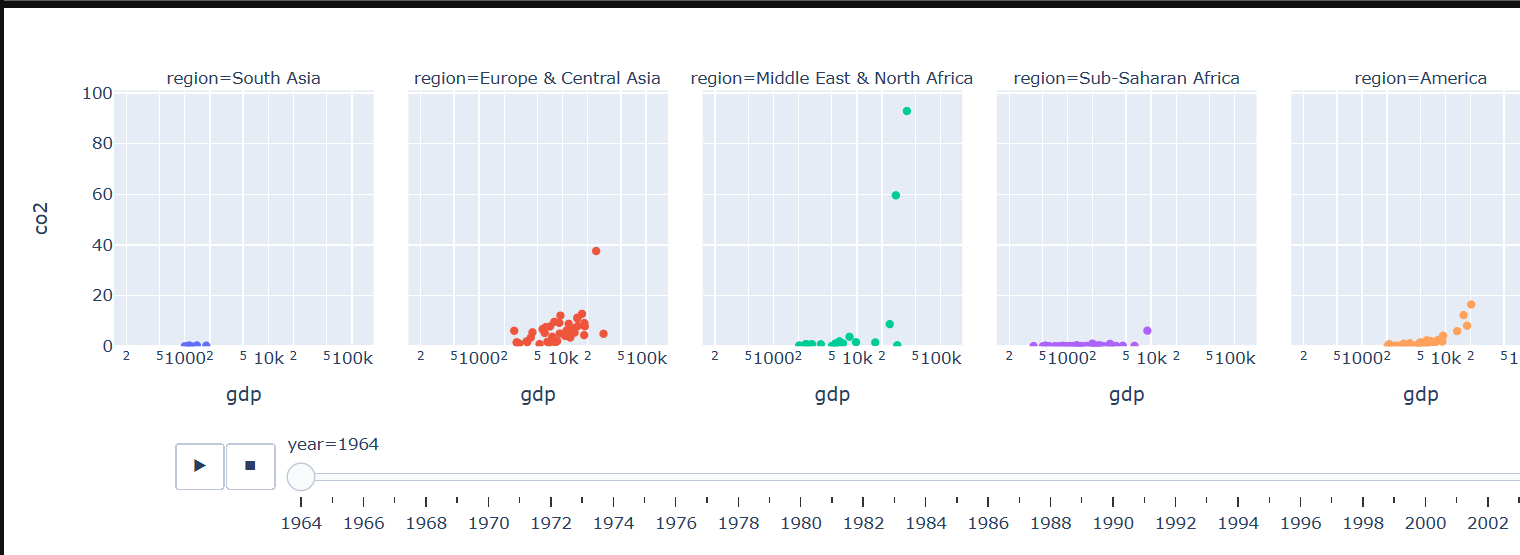

Fig: Interactive visualisation for world carbon dioxide emission per gdp

### Read plotly.express in python